In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Configuration du style
plt.style.use('ggplot')
sns.set_palette("pastel")

# Connexion à la base de données
conn = sqlite3.connect("recrutement.db")

# Chargement des données dans un DataFrame
query = "SELECT * FROM kpi_recrutement"
df = pd.read_sql_query(query, conn)
conn.close()

# Aperçu des données
print("Aperçu des données:")
display(df.head())

Aperçu des données:


,rh_nom,mois,kpi_nom,valeur,commentaire,periode_recrutement
0,Inès,Juillet,Nb de candidats contactés,92,,Q1/2023
1,Inès,Août,Nb de candidats contactés,78,,Q1/2023
2,Inès,Septembre,Nb de candidats contactés,66,,Q1/2023
3,Inès,Juillet,Nb d'entretiens candidats Salariés,4,,Q1/2023
4,Inès,Août,Nb d'entretiens candidats Salariés,1,,Q1/2023


In [3]:
# Fonction utilitaire pour formater les nombres
def format_number(x, pos):
    if x >= 1000:
        return f'{x/1000:.0f}K'
    return f'{x:.0f}'

formatter = FuncFormatter(format_number)


=== INDICATEURS CONSOLIDÉS DU TRIMESTRE ===
• Nb d'entretiens candidats Salariés: 27
• Nb d'entretiens candidats Sous-Traitants: 135
• Nb de candidats contactés: 809
• Nb de candidats intégrés Sous Traitants: 2
• Nb de candidats recrutés Salariés: 1

• Total recrutements aboutis: 3

• Recruteur le plus actif en contacts: Inès (236 contacts)
• Recruteur le plus performant en recrutements: Pauline (2 recrutements)


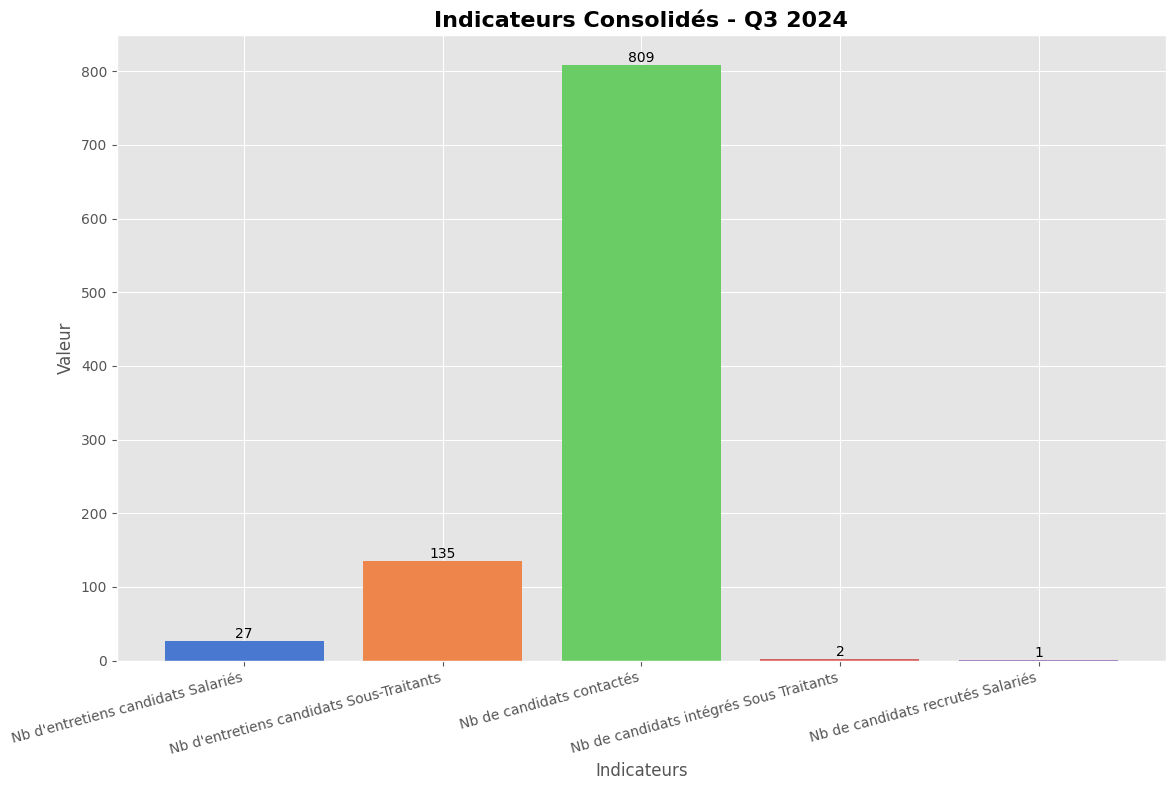

In [4]:
# Consolidation des KPI clés
consolidation = df.groupby('kpi_nom').agg({
    'valeur': 'sum'
}).reset_index()

# Filtrage des KPI importants
kpi_importants = [
    'Nb de candidats contactés',
    'Nb d\'entretiens candidats Salariés',
    'Nb d\'entretiens candidats Sous-Traitants',
    'Nb de candidats recrutés Salariés',
    'Nb de candidats intégrés Sous Traitants'
]

consolidation = consolidation[consolidation['kpi_nom'].isin(kpi_importants)]

# Calcul du nombre total de recrutements
total_recrutements = consolidation[
    consolidation['kpi_nom'].str.contains('recrutés|intégrés')
]['valeur'].sum()

# Identification des meilleurs recruteurs
contacts_par_rh = df[df['kpi_nom'] == 'Nb de candidats contactés'].groupby('rh_nom')['valeur'].sum()
meilleur_contact_rh = contacts_par_rh.idxmax()
max_contacts = contacts_par_rh.max()

recrutements_par_rh = df[
    df['kpi_nom'].str.contains('recrutés|intégrés')
].groupby('rh_nom')['valeur'].sum()
meilleur_recrutement_rh = recrutements_par_rh.idxmax()
max_recrutements = recrutements_par_rh.max()

# Affichage des résultats
print("\n=== INDICATEURS CONSOLIDÉS DU TRIMESTRE ===")
for kpi in consolidation.itertuples():
    print(f"• {kpi.kpi_nom}: {kpi.valeur}")

print(f"\n• Total recrutements aboutis: {total_recrutements}")
print(f"\n• Recruteur le plus actif en contacts: {meilleur_contact_rh} ({max_contacts} contacts)")
print(f"• Recruteur le plus performant en recrutements: {meilleur_recrutement_rh} ({max_recrutements} recrutements)")

# Visualisation des indicateurs consolidés
plt.figure(figsize=(12, 8))
bars = plt.bar(consolidation['kpi_nom'], consolidation['valeur'], color=sns.color_palette("muted"))

plt.title('Indicateurs Consolidés - Q3 2024', fontsize=16, fontweight='bold')
plt.xlabel('Indicateurs', fontsize=12)
plt.ylabel('Valeur', fontsize=12)
plt.xticks(rotation=15, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(formatter)

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# Charger le fichier Excel
excel_file = 'Data.xlsx'  # Remplace par le chemin vers ton fichier

# Lire toutes les feuilles dans un dictionnaire
sheets = pd.read_excel(excel_file, sheet_name=None)

# Parcourir chaque feuille et l'enregistrer en CSV
for sheet_name, df in sheets.items():
    csv_file = f'{sheet_name}.csv'  # Chaque fichier CSV porte le nom de la feuille
    df.to_csv(csv_file, index=False)
    print(f"Feuille '{sheet_name}' enregistrée sous {csv_file}")


Feuille 'Inès' enregistrée sous Inès.csv
Feuille 'Mariéme' enregistrée sous Mariéme.csv
Feuille 'Pauline' enregistrée sous Pauline.csv
Feuille 'Samya' enregistrée sous Samya.csv


In [7]:
import pandas as pd

# Lire le fichier en sautant les 2 premières lignes
df = pd.read_csv('Samya.csv', skiprows=2)

# Renommer les colonnes pour plus de clarté
df.columns = ['Processus', 'KPI', 'Type', 'Juillet', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4',
              'Août', 'Septembre', 'Total Trimestre', 'Commentaires']

# Remplir les valeurs manquantes dans "Processus"
df['Processus'] = df['Processus'].fillna(method='ffill')

# Supprimer les lignes complètement vides (optionnel)
df.dropna(how='all', inplace=True)

# Enregistrer le résultat nettoyé
df.to_csv('kpi_nettoye.csv', index=False)

print("CSV nettoyé et enregistré sous 'kpi_nettoye.csv'")


CSV nettoyé et enregistré sous 'kpi_nettoye.csv'


C:\Users\SAMIR\AppData\Local\Temp\ipykernel_5744\1013746414.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Processus'] = df['Processus'].fillna(method='ffill')


In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('kpi.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS kpi_recrutement (
        rh_nom TEXT,
        mois TEXT,
        kpi_nom TEXT,
        valeur INTEGER,
        commentaire TEXT,
        periode_recrutement TEXT
    )
''')

excel_file = 'Data.xlsx'  
sheets = pd.read_excel(excel_file, sheet_name=None)

for rh_nom, df in sheets.items():
    # Sauter les deux premières lignes
    df = df.iloc[2:].copy()
    df.columns = ['Processus', 'KPI', 'Type', 'Juillet', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4',
                  'Août', 'Septembre', 'Total', 'Commentaires']
    
    df['Processus'] = df['Processus'].fillna(method='ffill')
    
    # Garder seulement les lignes utiles (où KPI est non nul)
    df = df[df['KPI'].notna()]
    
    periode_raw = sheets[rh_nom].iloc[0]
    periode_recrutement = None
    for val in periode_raw:
        if isinstance(val, str) and "Q" in val:
            periode_recrutement = val
            break

    for mois in ['Juillet', 'Août', 'Septembre']:
        df_tmp = df[['KPI', mois, 'Commentaires']].copy()
        df_tmp = df_tmp.rename(columns={
            'KPI': 'kpi_nom',
            mois: 'valeur',
            'Commentaires': 'commentaire'
        })
        df_tmp['mois'] = mois
        df_tmp['rh_nom'] = rh_nom
        df_tmp['periode_recrutement'] = periode_recrutement

        # Nettoyer les valeurs
        df_tmp['valeur'] = pd.to_numeric(df_tmp['valeur'], errors='coerce').fillna(0).astype(int)

        # Réorganiser colonnes
        df_tmp = df_tmp[['rh_nom', 'mois', 'kpi_nom', 'valeur', 'commentaire', 'periode_recrutement']]

        # Insérer dans la base
        df_tmp.to_sql('kpi_recrutement', conn, if_exists='append', index=False)

print("Pipeline terminée. Données insérées dans la base.")

conn.commit()
conn.close()


C:\Users\SAMIR\AppData\Local\Temp\ipykernel_5744\1322313248.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Processus'] = df['Processus'].fillna(method='ffill')
C:\Users\SAMIR\AppData\Local\Temp\ipykernel_5744\1322313248.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Processus'] = df['Processus'].fillna(method='ffill')
C:\Users\SAMIR\AppData\Local\Temp\ipykernel_5744\1322313248.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Processus'] = df['Processus'].fillna(method='ffill')
C:\Users\SAMIR\AppData\Local\Temp\ipykernel_5744\1322313248.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Processus'] = df[

✅ Pipeline terminée. Données insérées dans la base.


In [9]:
import sqlite3
import pandas as pd

# Connexion à la base
conn = sqlite3.connect('kpi.db')

# Charger les données dans un DataFrame
df = pd.read_sql_query("SELECT * FROM kpi_recrutement LIMIT 20;", conn)

# Afficher le contenu
print(df)

conn.close()


   rh_nom     mois                                            kpi_nom  valeur  \
0    Inès  Juillet                    Nb de présentations aux clients       0   
1    Inès  Juillet                          Nb de candidats contactés      92   
2    Inès  Juillet                 Nb d'entretiens candidats Salariés       4   
3    Inès  Juillet           Nb d'entretiens candidats Sous-Traitants      23   
4    Inès  Juillet                 Nb de candidats recrutés Salariés        0   
5    Inès  Juillet           Nb de candidats intégrés Sous Traitants        1   
6    Inès  Juillet                   Nombre de présentations clients        1   
7    Inès  Juillet                          Nb de refus CDI Salariés        0   
8    Inès  Juillet  Nombre de KO candidat à la suite d'une présent...       0   
9    Inès  Juillet  Nombre de KO client à la suite d'une présentat...       0   
10   Inès     Août                    Nb de présentations aux clients       0   
11   Inès     Août          